In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [25]:
cols=["flength","fwidth","fsize","fconc","fconcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [26]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [27]:
df['class']=(df["class"]=="g").astype(int)

## plotting data

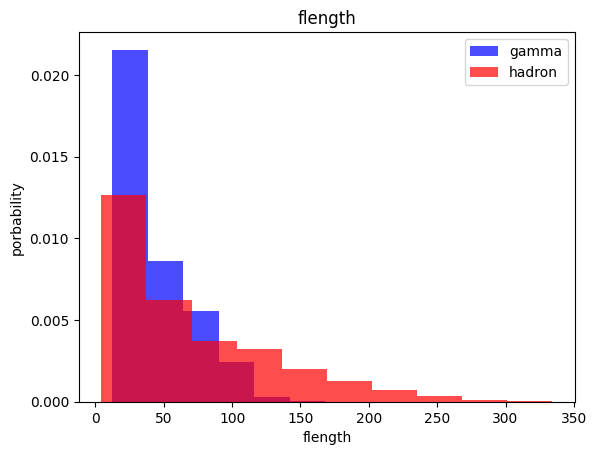

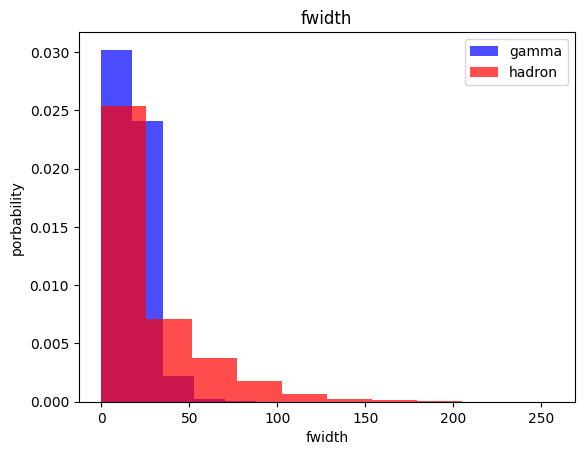

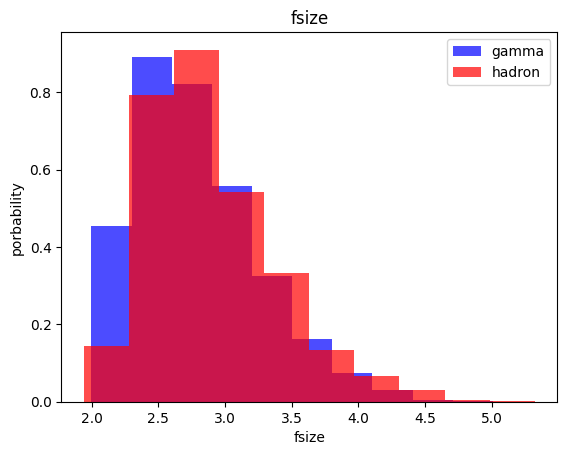

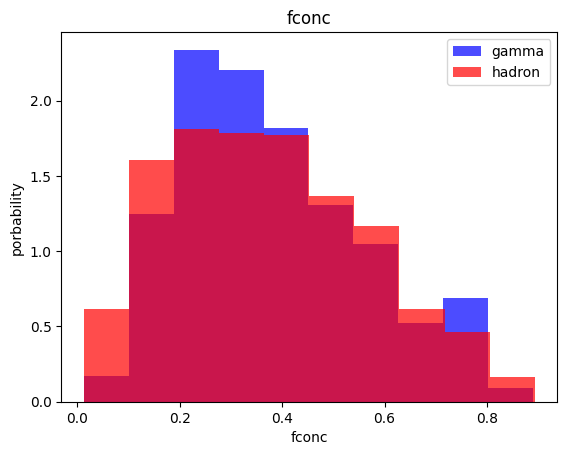

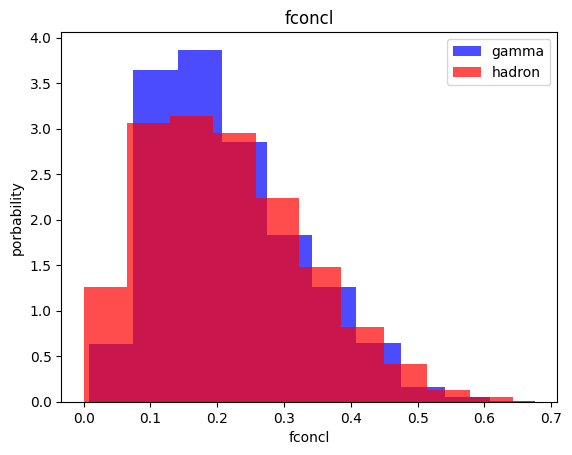

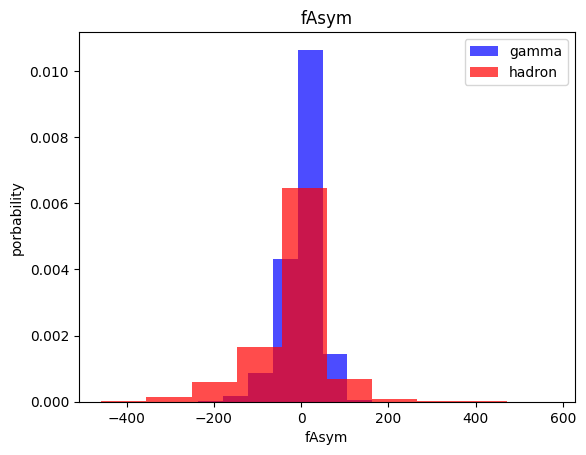

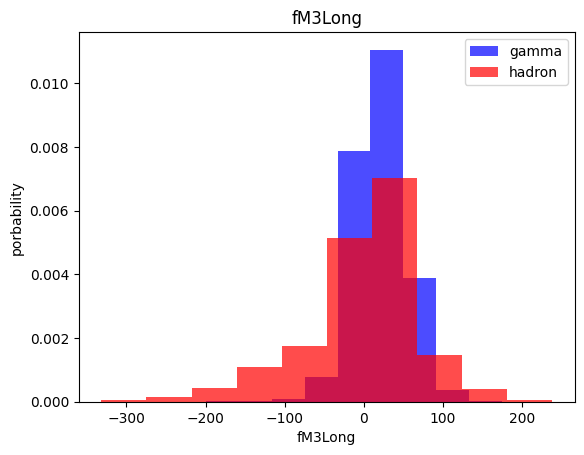

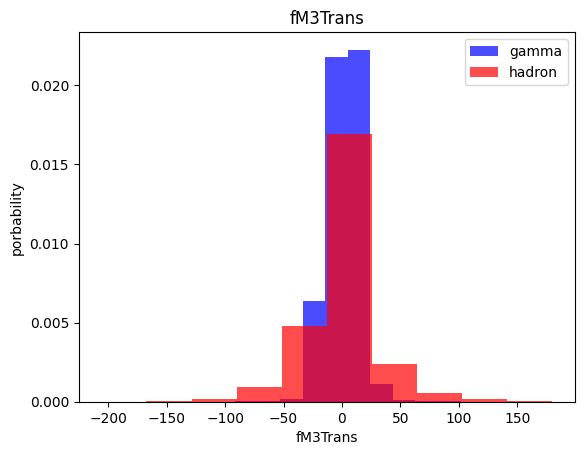

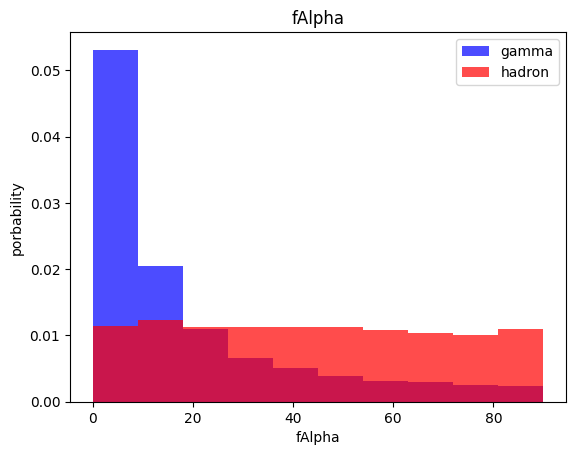

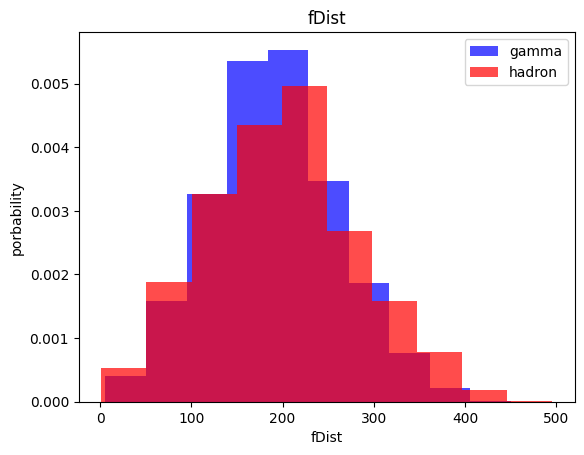

In [28]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("porbability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validation ,test datasets

In [29]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

C:\Users\kirolos\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## scaling the data set

In [30]:
def scale_dataset(dataframe, oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)

    data= np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y

In [31]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7376
4036


In [32]:
train ,x_train, y_train =scale_dataset(train,oversample=True)
valid ,x_valid, y_valid =scale_dataset(valid,oversample=False)
test ,x_test, y_test =scale_dataset(test,oversample=False)

In [33]:
len(y_train)
sum(y_train==1)

7376

## knn or k-nearest neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [35]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=knn_model.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1314
           1       0.86      0.86      0.86      2490

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [40]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1314
           1       0.74      0.88      0.80      2490

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg_model=GaussianNB()
lg_model=lg_model.fit(x_train,y_train)

In [43]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1314
           1       0.74      0.88      0.80      2490

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## support vector machine (SVM)

In [44]:
from sklearn.svm import SVC

In [45]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [46]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1314
           1       0.89      0.90      0.90      2490

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

